In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import kt_utils 

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import cv2

%matplotlib inline


Using TensorFlow backend.
D:\installFile\anaconda\envs\DL_py36_study\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\installFile\anaconda\envs\DL_py36_study\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\installFile\anaconda\envs\DL_py36_study\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\installFile\anaconda\en

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = kt_utils.load_dataset()
X_train = X_train_orig / 255
X_test = X_test_orig / 255

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T


print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [3]:
def model(input_shape):
    X_input = Input(input_shape)  # 定义一个tensor的placeholder，维度为input_shape
    X = ZeroPadding2D((3, 3))(X_input)  # 使用0填充，X_input周围填充0
    # CONV -> BN -> RELU
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    
    # 最大值池化层
    X = MaxPooling2D((2, 2), name = "max_pool")(X)
    # 矩阵转为向量，加上全连接层
    X = Flatten()(X)
    X = Dense(1, activation = 'sigmoid', name = 'fc')(X)
    
    model = Model(inputs = X_input, outputs = X, name = 'HappyModel') # 创建模型
    
    return model

In [4]:
# def HappyModel(input_shape):
#     X_input = Input(input_shape)
#     X = ZeroPadding2D((3, 3))(X_input)
#     X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
#     X = BatchNormalization(axis = 3, name = 'bn0')(X)
#     X = Activation('relu')(X)
#     X = MaxPooling2D((2, 2), name = "max_pool")(X)
#     X = Dense(1, activation = 'sigmoid', name = 'fc')(X)
#     model = Model(inputs = X_input, outputs = X, name = 'HappyModel')
#     return model

def HappyModel(input_shape):

    
    #你可以参考和上面的大纲
    X_input = Input(input_shape)

    #使用0填充：X_input的周围填充0
    X = ZeroPadding2D((3, 3))(X_input)

    #对X使用 CONV -> BN -> RELU 块
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)

    #最大值池化层
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    #降维，矩阵转化为向量 + 全连接层
    print('the shape of X before:', X.shape)
    X = Flatten()(X)
    print('the shape of X after:', X.shape)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    #创建模型，讲话创建一个模型的实体，我们可以用它来训练、测试。
    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    return model


**训练测试模型**：
1. 创建一个模型实体
2. 选择模型优化方法 ：model.compile(optimizer =  , loss = , metrics = )
3. 训练模型：model.fit(x = ,  y =  ,epochs = , batch_size = )
4. 评估模型：model.evaluate(x = , y = )

In [5]:
happy_model = HappyModel(X_train.shape[1:])
happy_model.compile("adam","binary_crossentropy", metrics = ['accuracy'])
happy_model.fit(X_train, Y_train, epochs = 40, batch_size = 50)  # 训练模型
preds = happy_model.evaluate(X_test, Y_test, batch_size = 32, verbose = 1, sample_weight = None)  # verbose = 1 输出进度条记录
print("loss:" + str(preds[0]))
print("accuracy:" + str(preds[1]))




W1001 13:54:48.642186 17200 deprecation_wrapper.py:119] From D:\installFile\anaconda\envs\DL_py36_study\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1001 13:54:48.711148 17200 deprecation.py:323] From D:\installFile\anaconda\envs\DL_py36_study\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


the shape of X before: (?, 32, 32, 32)
the shape of X after: (?, ?)


W1001 13:54:49.160898 17200 deprecation_wrapper.py:119] From D:\installFile\anaconda\envs\DL_py36_study\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/40
600/600 [==============================] - 6s 10ms/step - loss: 2.0144 - accuracy: 0.5717
Epoch 2/40
600/600 [==============================] - 6s 9ms/step - loss: 0.4254 - accuracy: 0.8250
Epoch 3/40
600/600 [==============================] - 6s 10ms/step - loss: 0.2649 - accuracy: 0.8867
Epoch 4/40
600/600 [==============================] - 6s 9ms/step - loss: 0.2196 - accuracy: 0.9150
Epoch 5/40
600/600 [==============================] - 6s 10ms/step - loss: 0.1570 - accuracy: 0.9450
Epoch 6/40
600/600 [==============================] - 6s 10ms/step - loss: 0.1115 - accuracy: 0.9667
Epoch 7/40
600/600 [==============================] - 6s 10ms/step - loss: 0.1022 - accuracy: 0.9700
Epoch 8/40
600/600 [==============================] - 6s 10ms/step - loss: 0.0869 - accuracy: 0.9733
Epoch 9/40
600/600 [==============================] - 6s 10ms/step - loss: 0.0761 - accuracy: 0.9783
Epoch 10/40
600/600 [==============================] - 6s 10ms/step - loss: 0.0826 - accuracy

[[1.]]


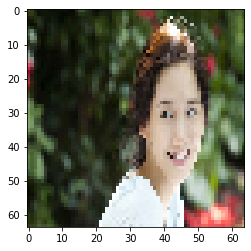

In [6]:
# img = image.load_img("smile_test.jpg", target_size = (64, 64)) 
# print('load_img.shape', img.shape)
# imshow(img)

#网上随便找的图片，侵删
img_path = 'image/smile_test.jpg'

# img = cv2.imread(img_path)
# print('img.shape', img.shape)

img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happy_model.predict(x))


In [7]:
happy_model.summary()

Model: "HappyModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0

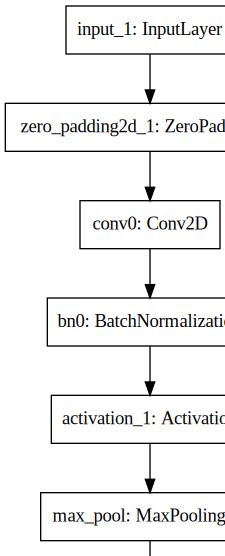

In [9]:
%matplotlib inline
plot_model(happy_model, to_file='happy_model.png')
SVG(model_to_dot(happy_model).create(prog='dot', format='svg'))
